In [1]:
import pandas as pd

data = pd.read_csv('titanic3.csv')

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Análisis Exploratorio de Datos (EDA)

In [2]:
data.shape

(1309, 14)

In [3]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

## Renombrar columnas

In [6]:
data = data.rename(columns={"pclass":"clase"})
data.head()

,clase,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Imputar valores perdidos (NaN)

In [7]:
data.isnull().sum()

clase           0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
# imputar valores a variables numéricas (int y float)
data['age'] = data["age"].fillna(data["age"].mean())
data['fare'] = data["fare"].fillna(data["fare"].mean())

In [9]:
# Imputar valores a variables 'object'
data['cabin'] = data["cabin"].fillna('Sin Información')
data['boat'] = data["boat"].fillna('Sin Información')
data['body'] = data["body"].fillna('Sin Información')
data['embarked'] = data["embarked"].fillna('Sin Información')
data['home.dest'] = data["home.dest"].fillna('Sin Información')

In [10]:
data.isnull().sum()

clase        0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

## Crear un subconjunto de datos

In [11]:
# Cuando se elijen 2 o más columnas se utilizan 2 corchetes
subset = data[["survived", "age", "home.dest"]] 
subset.head()

,survived,age,home.dest
0,1,29.0000,"St Louis, MO"
1,1,0.9167,"Montreal, PQ / Chesterville, ON"
2,0,2.0000,"Montreal, PQ / Chesterville, ON"
3,0,30.0000,"Montreal, PQ / Chesterville, ON"
4,0,25.0000,"Montreal, PQ / Chesterville, ON"


## Visualización de datos

In [12]:
import matplotlib.pyplot as plt

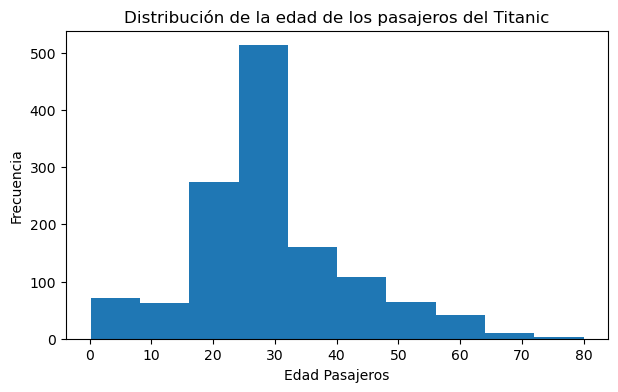

In [14]:
plt.subplots(figsize=(7,4))
plt.hist(data['age'])
plt.title('Distribución de la edad de los pasajeros del Titanic')
plt.xlabel('Edad Pasajeros')
plt.ylabel('Frecuencia')
plt.show()

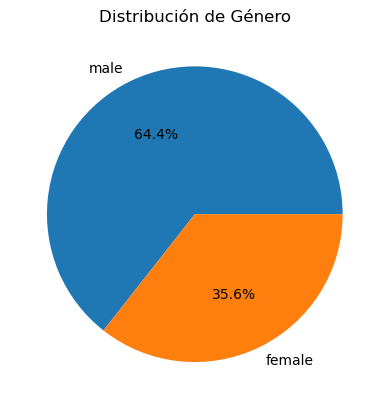

In [25]:
genero = data['sex'].value_counts()
plt.pie(genero, labels=genero.index, autopct='%1.1f%%')
plt.title('Distribución de Género')
plt.show()

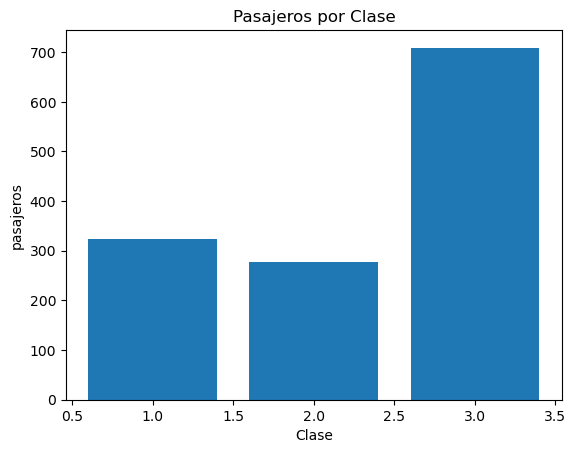

In [28]:
survived = data['clase'].value_counts()
plt.bar(survived.index, survived.values)
plt.title('Pasajeros por Clase')
plt.xlabel('Clase')
plt.ylabel('pasajeros')
plt.show()

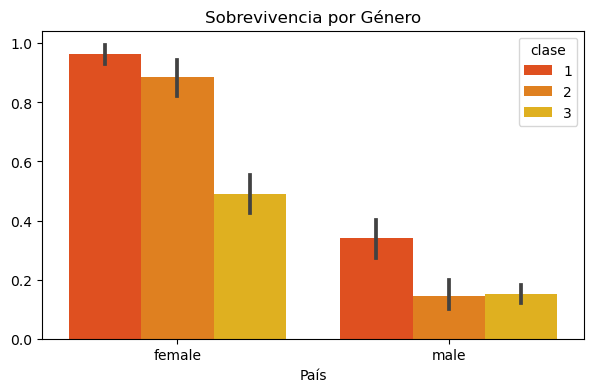

In [33]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.barplot(x=data["sex"], y = data["survived"], hue =  data["clase"], palette="autumn")
plt.title("Sobrevivencia por Género")
plt.ylabel("")
plt.xlabel("País")
plt.show()